<a href="https://colab.research.google.com/github/nehana4sph/TCS-iON_RIO-125-Forecasting-System/blob/main/Forecasting_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Forecasting and EDA
**Exploratory data Analysis**



In [ ]:
!pip install pandas==1.2.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 22.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
!pip install xlrd==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
!pip install pystan==2.19

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.2 MB 16 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


Restart Runtime.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Internship/Superstore.xls')
print(df.head())
print(df.tail())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [ ]:
#Check number of rows and columns, type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

We found out the total number of rows and columns in the data set and the data type of each column using infofunction. The dataset comprises 9994 observations and 21 columns. All the columns have the correct data format (The date is in DateTime format and the rest are float). None of the columns have any null values

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


(1) Here as you can notice mean value is more than the median value of most columns which is represented by 50%(50th percentile) in the index column.
(2) There is notably a big difference between 75th percentile and max values of certain fields like "Sales","Quantity","Sales".
(3) Thus observations 1 and 2 suggest that there are extreme values-Outliers in our data set. 



In [ ]:
# Dropping the column 'Row ID', as it does not help much in the process of data analysis of the dataset.
df.drop('Row ID',axis = 1, inplace = True)


In [ ]:
print('Order Date Description\n') 
print(df['Order Date'].describe()) #Displays the distribution of dates in 'Order Data' column
print('\nShip Date Description\n')
print(df['Ship Date'].describe()) #Displays the distribution of dates in 'Ship Data' column

Order Date Description

count                    9994
unique                   1237
top       2016-09-05 00:00:00
freq                       38
first     2014-01-03 00:00:00
last      2017-12-30 00:00:00
Name: Order Date, dtype: object

Ship Date Description

count                    9994
unique                   1334
top       2015-12-16 00:00:00
freq                       35
first     2014-01-07 00:00:00
last      2018-01-05 00:00:00
Name: Ship Date, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


In [ ]:
print(df.isnull().sum())

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True) #Sorting data by  ascending order of the coloumn values 'Order Date'
df.set_index("Order Date", inplace = True) #Setting 'Order Date' as index of the dataframe 'df' for ease of Time Series Analysis

In [ ]:
# To forecast sales seven days later of the order date, let us create a new dataframe with only the target column i.e, 
# the 'Sales' column and 'Order Date' as the index 

new_data = pd.DataFrame(df['Sales'])
new_data

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,11.784
2014-01-04,272.736
2014-01-04,3.540
2014-01-05,19.536
...,...
2017-12-30,3.024
2017-12-30,52.776
2017-12-30,90.930


**Top 10 States which generate the highest revenue**


In [ ]:
Top_states = df.groupby(["State"]).sum().sort_values("Sales",ascending=False).head(20)
Top_states = Top_states[["Sales"]].round(2)
Top_states.reset_index(inplace=True)


(array([     0., 100000., 200000., 300000., 400000., 500000.]),
 <a list of 6 Text major ticklabel objects>)

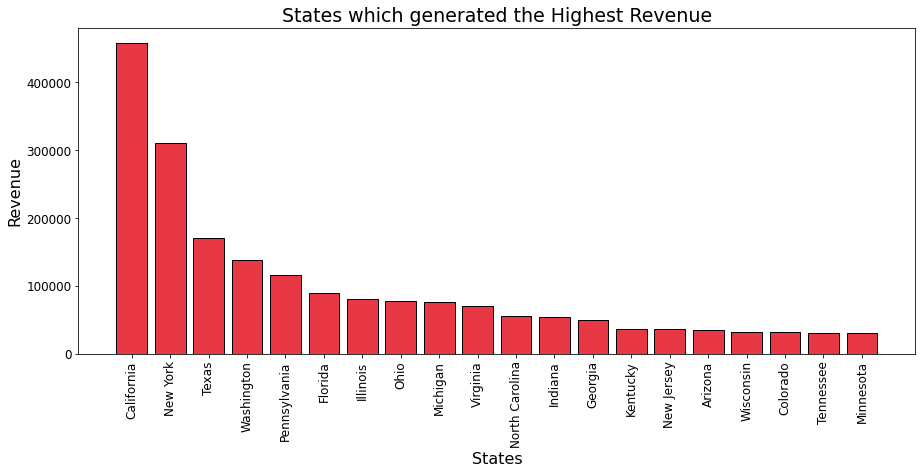

In [ ]:
plt.figure(figsize = (15,6))
plt.title("States which generated the Highest Revenue", fontsize=19)
plt.bar(Top_states["State"], Top_states["Sales"],color='#E83845',edgecolor='black',linewidth = 1)
plt.xlabel("States",fontsize=16)
plt.ylabel("Revenue",fontsize=16)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)


**Top 10 cities generated highest revenue**

In [ ]:
Top_cities = df.groupby(["City"]).sum().sort_values("Sales",ascending=False).head(20)
Top_cities = Top_cities[["Sales"]].round(2)
Top_cities.reset_index(inplace=True)


(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 <a list of 7 Text major ticklabel objects>)

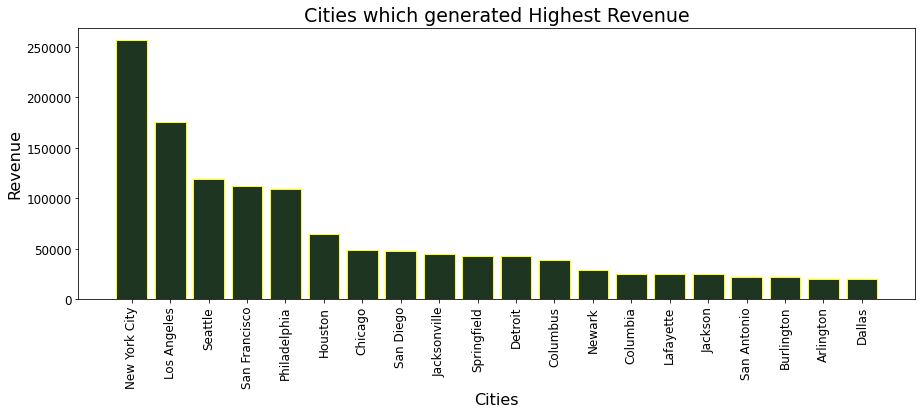

In [ ]:
plt.figure(figsize =(15,5))
plt.title("Cities which generated Highest Revenue",fontsize=19)
plt.bar(Top_cities["City"], Top_cities["Sales"], color="#1e3522", edgecolor='yellow',linewidth=1)
plt.xlabel("Cities",fontsize=16)
plt.ylabel("Revenue",fontsize=16)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)

**Revenue generated by each category**

In [ ]:
Top_category = df.groupby(["Category"]).sum().sort_values("Sales",ascending=False)
Top_category = Top_category[["Sales"]]
total_revenue_category = Top_category["Sales"].sum()
total_revenue_category = str(int(total_revenue_category))
total_revenue_category = '$' + total_revenue_category
Top_category.reset_index(inplace=True)


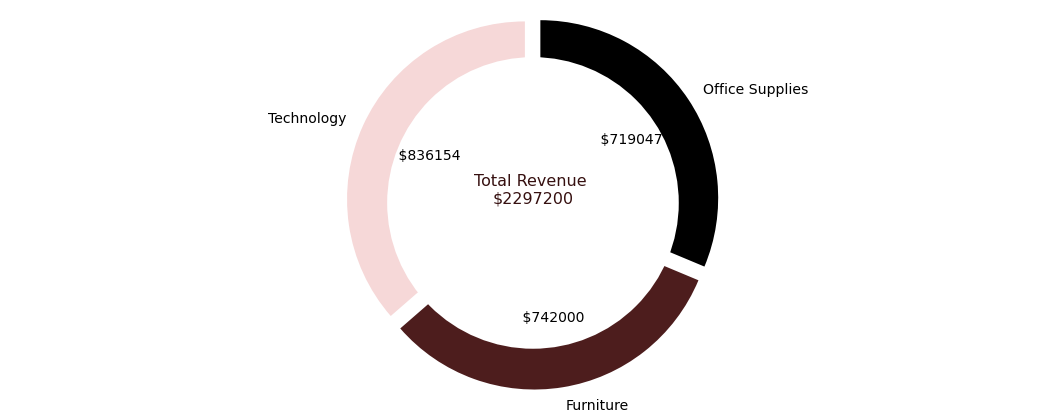

In [ ]:
plt.rcParams["figure.figsize"] = (15,6)
plt.rcParams['font.size'] = 14.0
plt.rcParams['font.weight'] = 6

def autopct_format(values):
  def new_format(pct):
    total = sum(values)
    val = int(round(pct*total/100.0))
    return ' ${v:d}'.format(v=val)
  return new_format
colors =['#f6d8d8','#4d1d1d','#000000']
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'],autopct=autopct_format(Top_category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
label = ax1.annotate('Total Revenue \n' +str(total_revenue_category),color='#361010',xy=(0,0), fontsize=16, ha="center")
plt.tight_layout()
plt.show()



We can see that Category - Technology generated the highest revenue of about $827426.

The Total Revenue generated by all the categories - $2261536.

**Segment with the Highest sales.**

In [ ]:
Top_segment = df.groupby(["Segment"]).sum().sort_values("Sales", ascending=False)
Top_segment = Top_segment[["Sales"]] 
Top_segment.reset_index(inplace=True)
total_revenue_segement = Top_segment["Sales"].sum()
total_revenue_segement = str(int(total_revenue_segement))
total_revenue_segement= '$' + total_revenue_segement

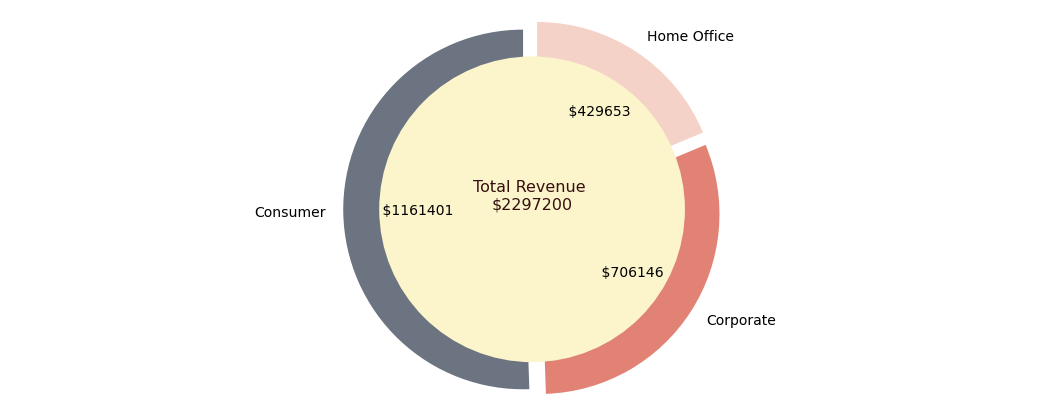

In [ ]:
plt.rcParams["figure.figsize"] = (15,6)
plt.rcParams['font.size'] = 14.0 
plt.rcParams['font.weight'] = 8 
colors = ['#6c7481','#e28274','#f4d2c8'] 
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_segment['Sales'], colors = colors, labels=Top_segment['Segment'], autopct= autopct_format(Top_segment['Sales']),startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.85,fc='#fcf4cb') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_segement),color = '#361010', xy=(0, 0), fontsize=16, ha="center")
plt.tight_layout()
plt.show()

We can see that Segment - Consumer generated the highest revenue of about $1148061.

The Total Revenue generated by all the segments - $209624.

**Correlation of Features**




(1) Segment and Sales

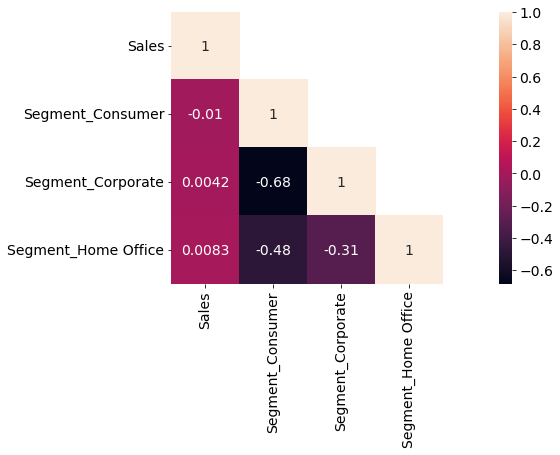

In [ ]:
df1 = df[['Segment','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, cbar = True, annot =True);


(2) Category and Sales

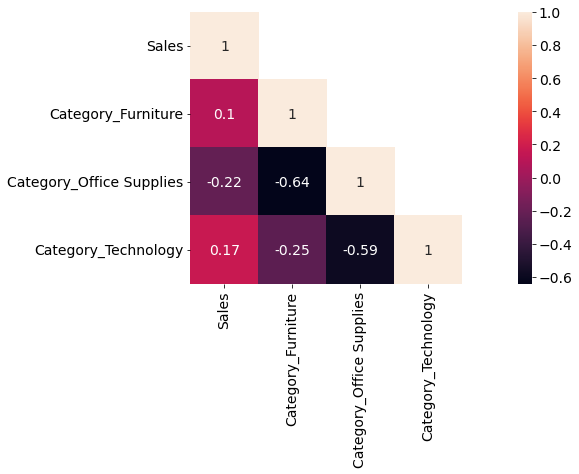

In [ ]:
df1 = df[['Category','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, cbar = True, annot =True);


(3) Ship Mode and Sales

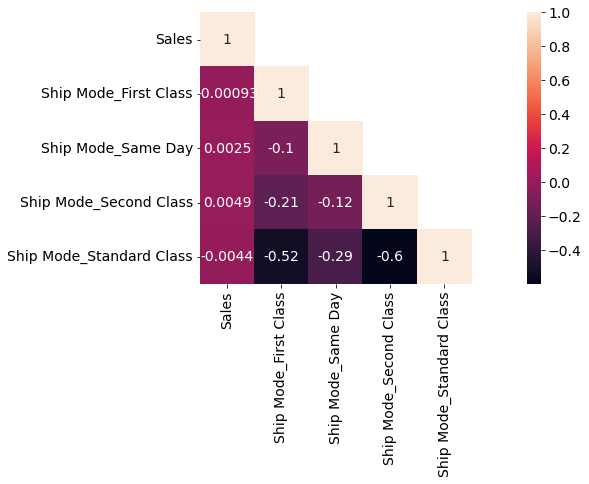

In [ ]:
df1 = df[['Ship Mode','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, cbar = True, annot =True);
